## Домашнее задание к занятию "A/B-тесты"

### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [51]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [52]:
import warnings

# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd

from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro

pokemon = pd.read_csv(
    'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv',
    on_bad_lines='skip')  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


### Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

H0: Нет разницы в атаке между группами.

Attack                                                       
       count       mean        std   min   25%   50%     75%    max
Class                                                              
Grass   93.0  73.731183  24.179645  27.0  59.0  70.0   95.00  132.0
Rock    56.0  91.785714  34.805284  10.0  63.0  92.5  116.25  165.0

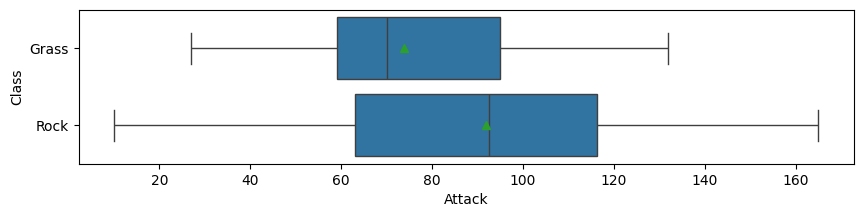

In [53]:
des_class = ['Grass', 'Rock']
z1df = pokemon.copy()

z1df.drop(z1df[(pokemon['Class 1'].isin(des_class)) & (pokemon['Class 2'].isin(des_class))].index, inplace=True)
z1df.loc[(z1df['Class 1'] == 'Grass') | (z1df['Class 2'] == 'Grass'), 'Class'] = 'Grass'
z1df.loc[(z1df['Class 1'] == 'Rock') | (z1df['Class 2'] == 'Rock'), 'Class'] = 'Rock'
z1df = z1df[~(z1df['Class'] == 'nan')]

z1df = z1df[["Class", "Attack", ]]
display(z1df.groupby("Class").describe())

plt.figure(figsize=(10,2))
sns.boxplot(data=z1df, y='Class', x='Attack', showmeans=True)
plt.show()

data_grass = z1df[z1df["Class"] == "Grass"]["Attack"].values
data_rock = z1df[z1df["Class"] == "Rock"]["Attack"].values




нормально распределение

stat = 0.978, pval = 0.112
stat = 0.982, pval = 0.586


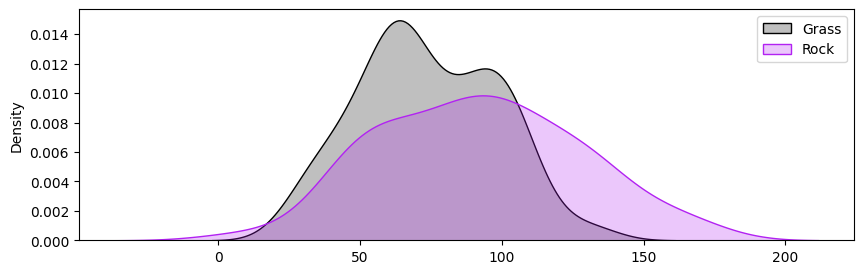

In [54]:
stat, pval = st.shapiro(data_grass)
print("stat = %.3f, pval = %.3f" % (stat, pval))

stat, pval = st.shapiro(data_rock)
print("stat = %.3f, pval = %.3f" % (stat, pval))

plt.figure(figsize=(10,3))
sns.kdeplot(data_grass, label="Grass", fill = True, color = '#000000')
sns.kdeplot(data_rock, label="Rock", fill = True, color = '#B222F2')
plt.legend()
plt.show()

In [55]:
# define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1) / np.var(y, ddof=1)  # calculate F test statistic
    dfn = x.size - 1  # define degrees of freedom numerator
    dfd = y.size - 1  # define degrees of freedom denominator
    p = 1 - st.f.cdf(f, dfn, dfd)  # find p-value of F test statistic
    return f, p

print(f_test(data_grass,data_rock))


(0.48262460954678815, 0.9990088840898671)


In [56]:
s, p = st.ttest_ind(data_grass, data_rock)
print("stat = %.3f, pval = %.3f" % (s, p))

# s, p = st.f_oneway(data_grass, data_rock)
# print("stat = %.3f, pval = %.3f" % (s, p))

# s, p = st.mannwhitneyu(data_grass, data_rock)
# print("stat = %.3f, pval = %.3f" % (s, p))


stat = -3.729, pval = 0.000


вывод: pval < 0.05, Разница есть отклоняем H0<br>
Атака в Rock больше, т.к. среднее значение в классе Rock больше.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

H0: Покемоны в классе Water такие же как и покемоны в классе Normal

In [57]:
des_class = ['Water', 'Normal']
z2df = pokemon.copy()
z2df.drop(z2df[(pokemon['Class 1'].isin(des_class)) & (pokemon['Class 2'].isin(des_class))].index, inplace=True)
z2df.loc[(z2df['Class 1'] == 'Water') | (z2df['Class 2'] == 'Water'), 'Class'] = 'Water'
z2df.loc[(z2df['Class 1'] == 'Normal') | (z2df['Class 2'] == 'Normal'), 'Class'] = 'Normal'
z2df = z2df[~(z2df['Class'] == 'nan')]

print(z2df["Class"].value_counts())
z2df.groupby("Class")["Speed"].describe()

Class
Water     125
Normal    101
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
Normal,101.0,72.257426,28.42733,5.0,50.0,72.0,93.0,135.0
Water,125.0,64.936000,22.74889,15.0,50.0,65.0,81.0,122.0


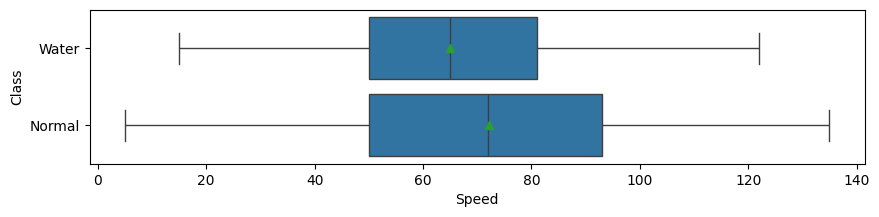

In [58]:

plt.figure(figsize=(10,2))
sns.boxplot(data=z2df, y='Class', x='Speed', showmeans=True);
plt.show()


In [59]:
z2df.groupby("Class")["Speed"].agg(pd.Series.mode)

Class
Normal         100
Water     [60, 70]
Name: Speed, dtype: object

In [60]:
data_water = z2df[z2df["Class"] == "Water"]["Speed"].values
data_normal = z2df[z2df["Class"] == "Normal"]["Speed"].values

s, p = st.ttest_ind(data_water, data_normal)
print("stat = %.3f, pval = %.3f" % (s, p))


stat = -2.151, pval = 0.033


вывод: pval < 0.05, отклоняем H0, т.к. имеется разница между Water и Normal<br>
Покемоны в классе water медленнеее по Параметрам: среднее зн., медианное зн., мода зн.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

h0: выборки равны.

In [61]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

145.0 67.89195979899498


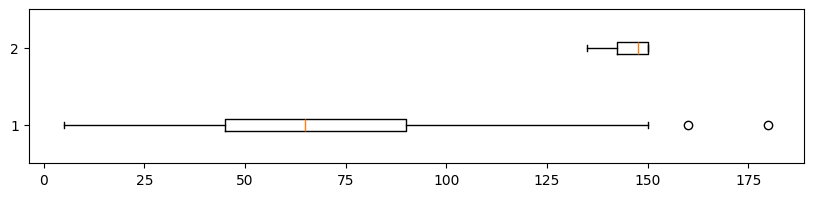

In [62]:
z3df = pokemon.copy()
z3df_threated = z3df[z3df['Name'].isin(treathed_pokemon)]
z3df_other = z3df[~(z3df['Name'].isin(treathed_pokemon))]
print(z3df_threated["Speed"].mean(), z3df_other["Speed"].mean())

plt.figure(figsize=(10,2))
plt.boxplot([z3df_other["Speed"],z3df_threated["Speed"]], vert=False)
plt.show()

In [63]:
z_stat, pval = st.ttest_ind(z3df_other["Speed"].values, z3df_threated["Speed"].values)
print(f'z-статистика: {z_stat:.2f}', f'p-value: {pval:.3f}')

# control_sample1 = z3df_other.sample(n=4, random_state=24)
# control_sample2 = z3df_other.sample(n=4, random_state=42)

# stat, p = st.kruskal(control_sample1["Speed"].values, control_sample2["Speed"].values, z3df_threated["Speed"].values)
# print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

z-статистика: -5.39 p-value: 0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


Вывод: pval < 0.05 отлоняем H0.<br>
Исходя из графика видим, что скорость тестовой группы намного выше скорости средней всей выборки.


<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

H0: HP, Attack, Defence не отличается между legendary и остальными

In [64]:
z4df = pokemon.copy()
z4df_legendary = z4df[z4df["Legendary"] == True][["HP", "Attack", "Defense"]]
z4df_other = z4df[z4df["Legendary"] == False][["HP", "Attack", "Defense"]]

(z4df_legendary.describe(), z4df_other.describe())

(               HP      Attack     Defense
 count   65.000000   65.000000   65.000000
 mean    92.738462  116.676923   99.661538
 std     21.722164   30.348037   28.255131
 min     50.000000   50.000000   20.000000
 25%     80.000000  100.000000   90.000000
 50%     91.000000  110.000000  100.000000
 75%    105.000000  131.000000  115.000000
 max    150.000000  190.000000  200.000000,
                HP      Attack     Defense
 count  735.000000  735.000000  735.000000
 mean    67.182313   75.669388   71.559184
 std     24.808849   30.490153   30.408194
 min      1.000000    5.000000    5.000000
 25%     50.000000   54.500000   50.000000
 50%     65.000000   72.000000   66.000000
 75%     79.500000   95.000000   85.000000
 max    255.000000  185.000000  230.000000)

stat = 11.592, pval = 0.000


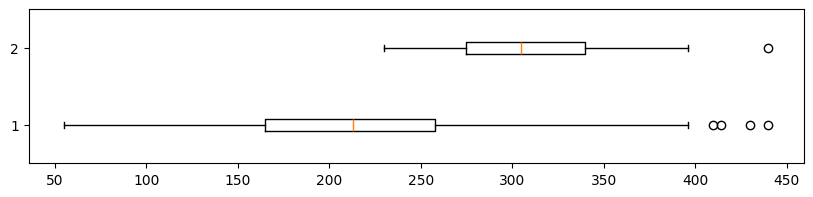

In [65]:
z4df_legendary["SUM_HAD"] = z4df_legendary["HP"] + z4df_legendary["Attack"] + z4df_legendary["Defense"]
z4df_other["SUM_HAD"] = z4df_other["HP"] + z4df_other["Attack"] + z4df_other["Defense"]

stat, pval = st.ttest_ind(z4df_legendary["SUM_HAD"].values, z4df_other["SUM_HAD"].values)
print("stat = %.3f, pval = %.3f" % (stat, pval))

plt.figure(figsize=(10,2))
plt.boxplot([z4df_other["SUM_HAD"], z4df_legendary["SUM_HAD"]], vert=False)
plt.show()

Вывод: pval < 0.05, отклоняем H0<br>
Сумма характеристик у легендарных покемонов выше, по ср. значению.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

H0: best_defence_class одинаковые по силе обычной защиты

In [66]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

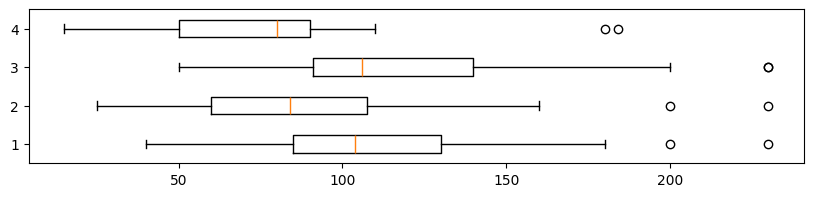

In [67]:
z5df = pokemon.copy()

z5df_rock = z5df[(z5df["Class 1"] == "Rock") | (z5df["Class 2"] == "Rock")]
z5df_ground = z5df[(z5df["Class 1"] == "Ground") | (z5df["Class 2"] == "Ground")]
z5df_steel = z5df[(z5df["Class 1"] == "Steel") | (z5df["Class 2"] == "Steel")]
z5df_ice = z5df[(z5df["Class 1"] == "Ice") | (z5df["Class 2"] == "Ice")]

plt.figure(figsize=(10,2))
plt.boxplot([z5df_rock["Defense"], z5df_ground["Defense"], z5df_steel["Defense"], z5df_ice["Defense"]], vert=False)
plt.show()


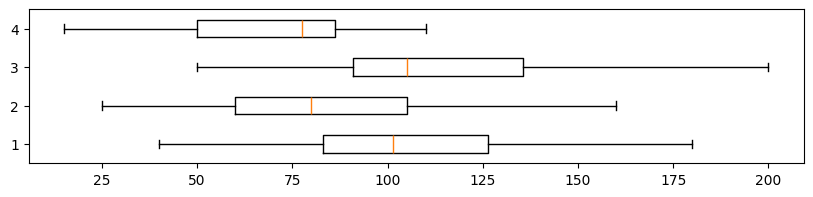

In [68]:
def remove_outliers(data):
    iqr = data.quantile(0.75) - data.quantile(0.25)
    lower_bound = data.quantile(0.25) - (iqr * 1.5)
    upper_bound = data.quantile(0.75) + (iqr * 1.5)
    return data[(data > lower_bound) & (data < upper_bound)]

z5df_rock_vals = remove_outliers(z5df_rock["Defense"])
z5df_ground_vals = remove_outliers(z5df_ground["Defense"])
z5df_steel_vals = remove_outliers(z5df_steel["Defense"])
z5df_ice_vals = remove_outliers(z5df_ice["Defense"])

plt.figure(figsize=(10,2))
plt.boxplot([z5df_rock_vals, z5df_ground_vals, z5df_steel_vals, z5df_ice_vals], vert=False)
plt.show()


In [69]:
fvalue, pvalue = st.f_oneway(z5df_rock_vals, z5df_ground_vals, z5df_steel_vals, z5df_ice_vals)
print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))

stat, p = st.kruskal(z5df_rock_vals, z5df_ground_vals, z5df_steel_vals, z5df_ice_vals)
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=16.279, p=0.000000
Статистика = 39.398, p = 0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


In [70]:
df_cross = pd.DataFrame({
    "Rock": z5df_rock_vals,
    "Ground": z5df_ground_vals,
    "Steel": z5df_steel_vals,
    "Ice": z5df_ice_vals
})

df_melt = pd.melt(df_cross, value_vars=['Rock', 'Ground', 'Steel', 'Ice'])
df_melt.dropna(inplace=True)

tukey = pairwise_tukeyhsd(endog=df_melt["value"].values, groups=df_melt["variable"],alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Ground    Ice -12.9791  0.176 -29.4421   3.484  False
Ground   Rock  19.4475 0.0033   4.9998 33.8952   True
Ground  Steel  28.0026    0.0    12.83 43.1752   True
   Ice   Rock  32.4266    0.0  15.4986 49.3546   True
   Ice  Steel  40.9817    0.0  23.4309 58.5324   True
  Rock  Steel   8.5551 0.4922  -7.1208  24.231  False
-----------------------------------------------------


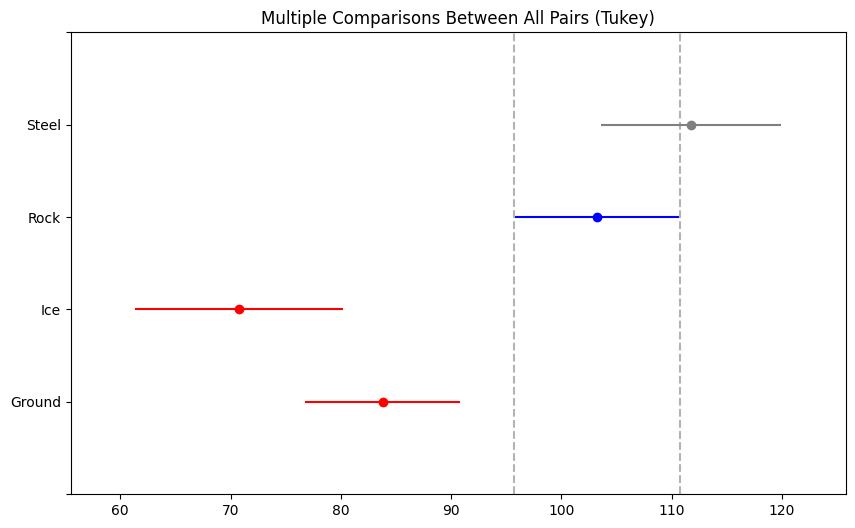

In [71]:
tukey.plot_simultaneous(comparison_name="Rock");

Вывод: pval < 0.05, отклоняем H0, классы отличаются по силе защиты.<br>
Одинаковыми можно считать только Rock и Steel, а также Ground и Ice

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.